In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Bank_Churn.csv')

<h3>Check top 5 rows of the dataset</h3>

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>Information and statistics about the dataset</h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<h3>Check Null values of the dataset</h3>

In [11]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h3>Dropping irrelevant columns</h3>

In [13]:
df.drop(columns=['CustomerId','Surname'],inplace=True,axis=1)

<h2>EDA</h2>

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


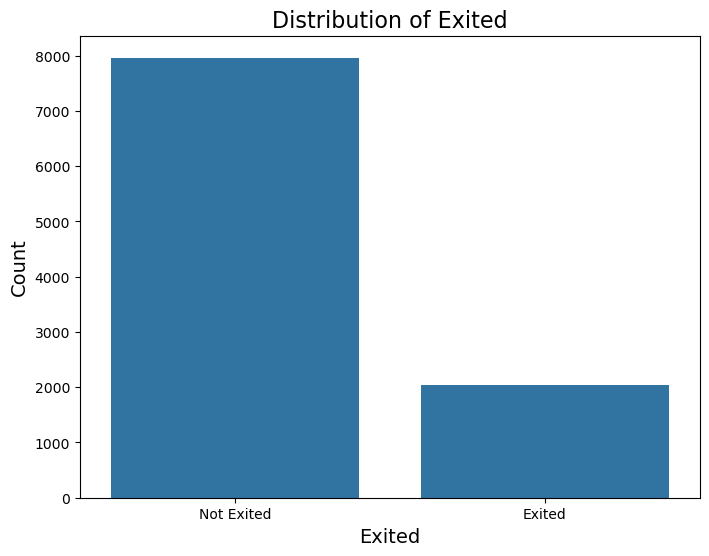

In [17]:
# Count Plot of our Y - Check the balance of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Exited")
plt.title("Distribution of Exited", fontsize=16)
plt.xlabel("Exited", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["Not Exited", "Exited"])
plt.show()

In [18]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
df_grp=df.groupby('Geography')
df_grp['CreditScore'].mean()

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

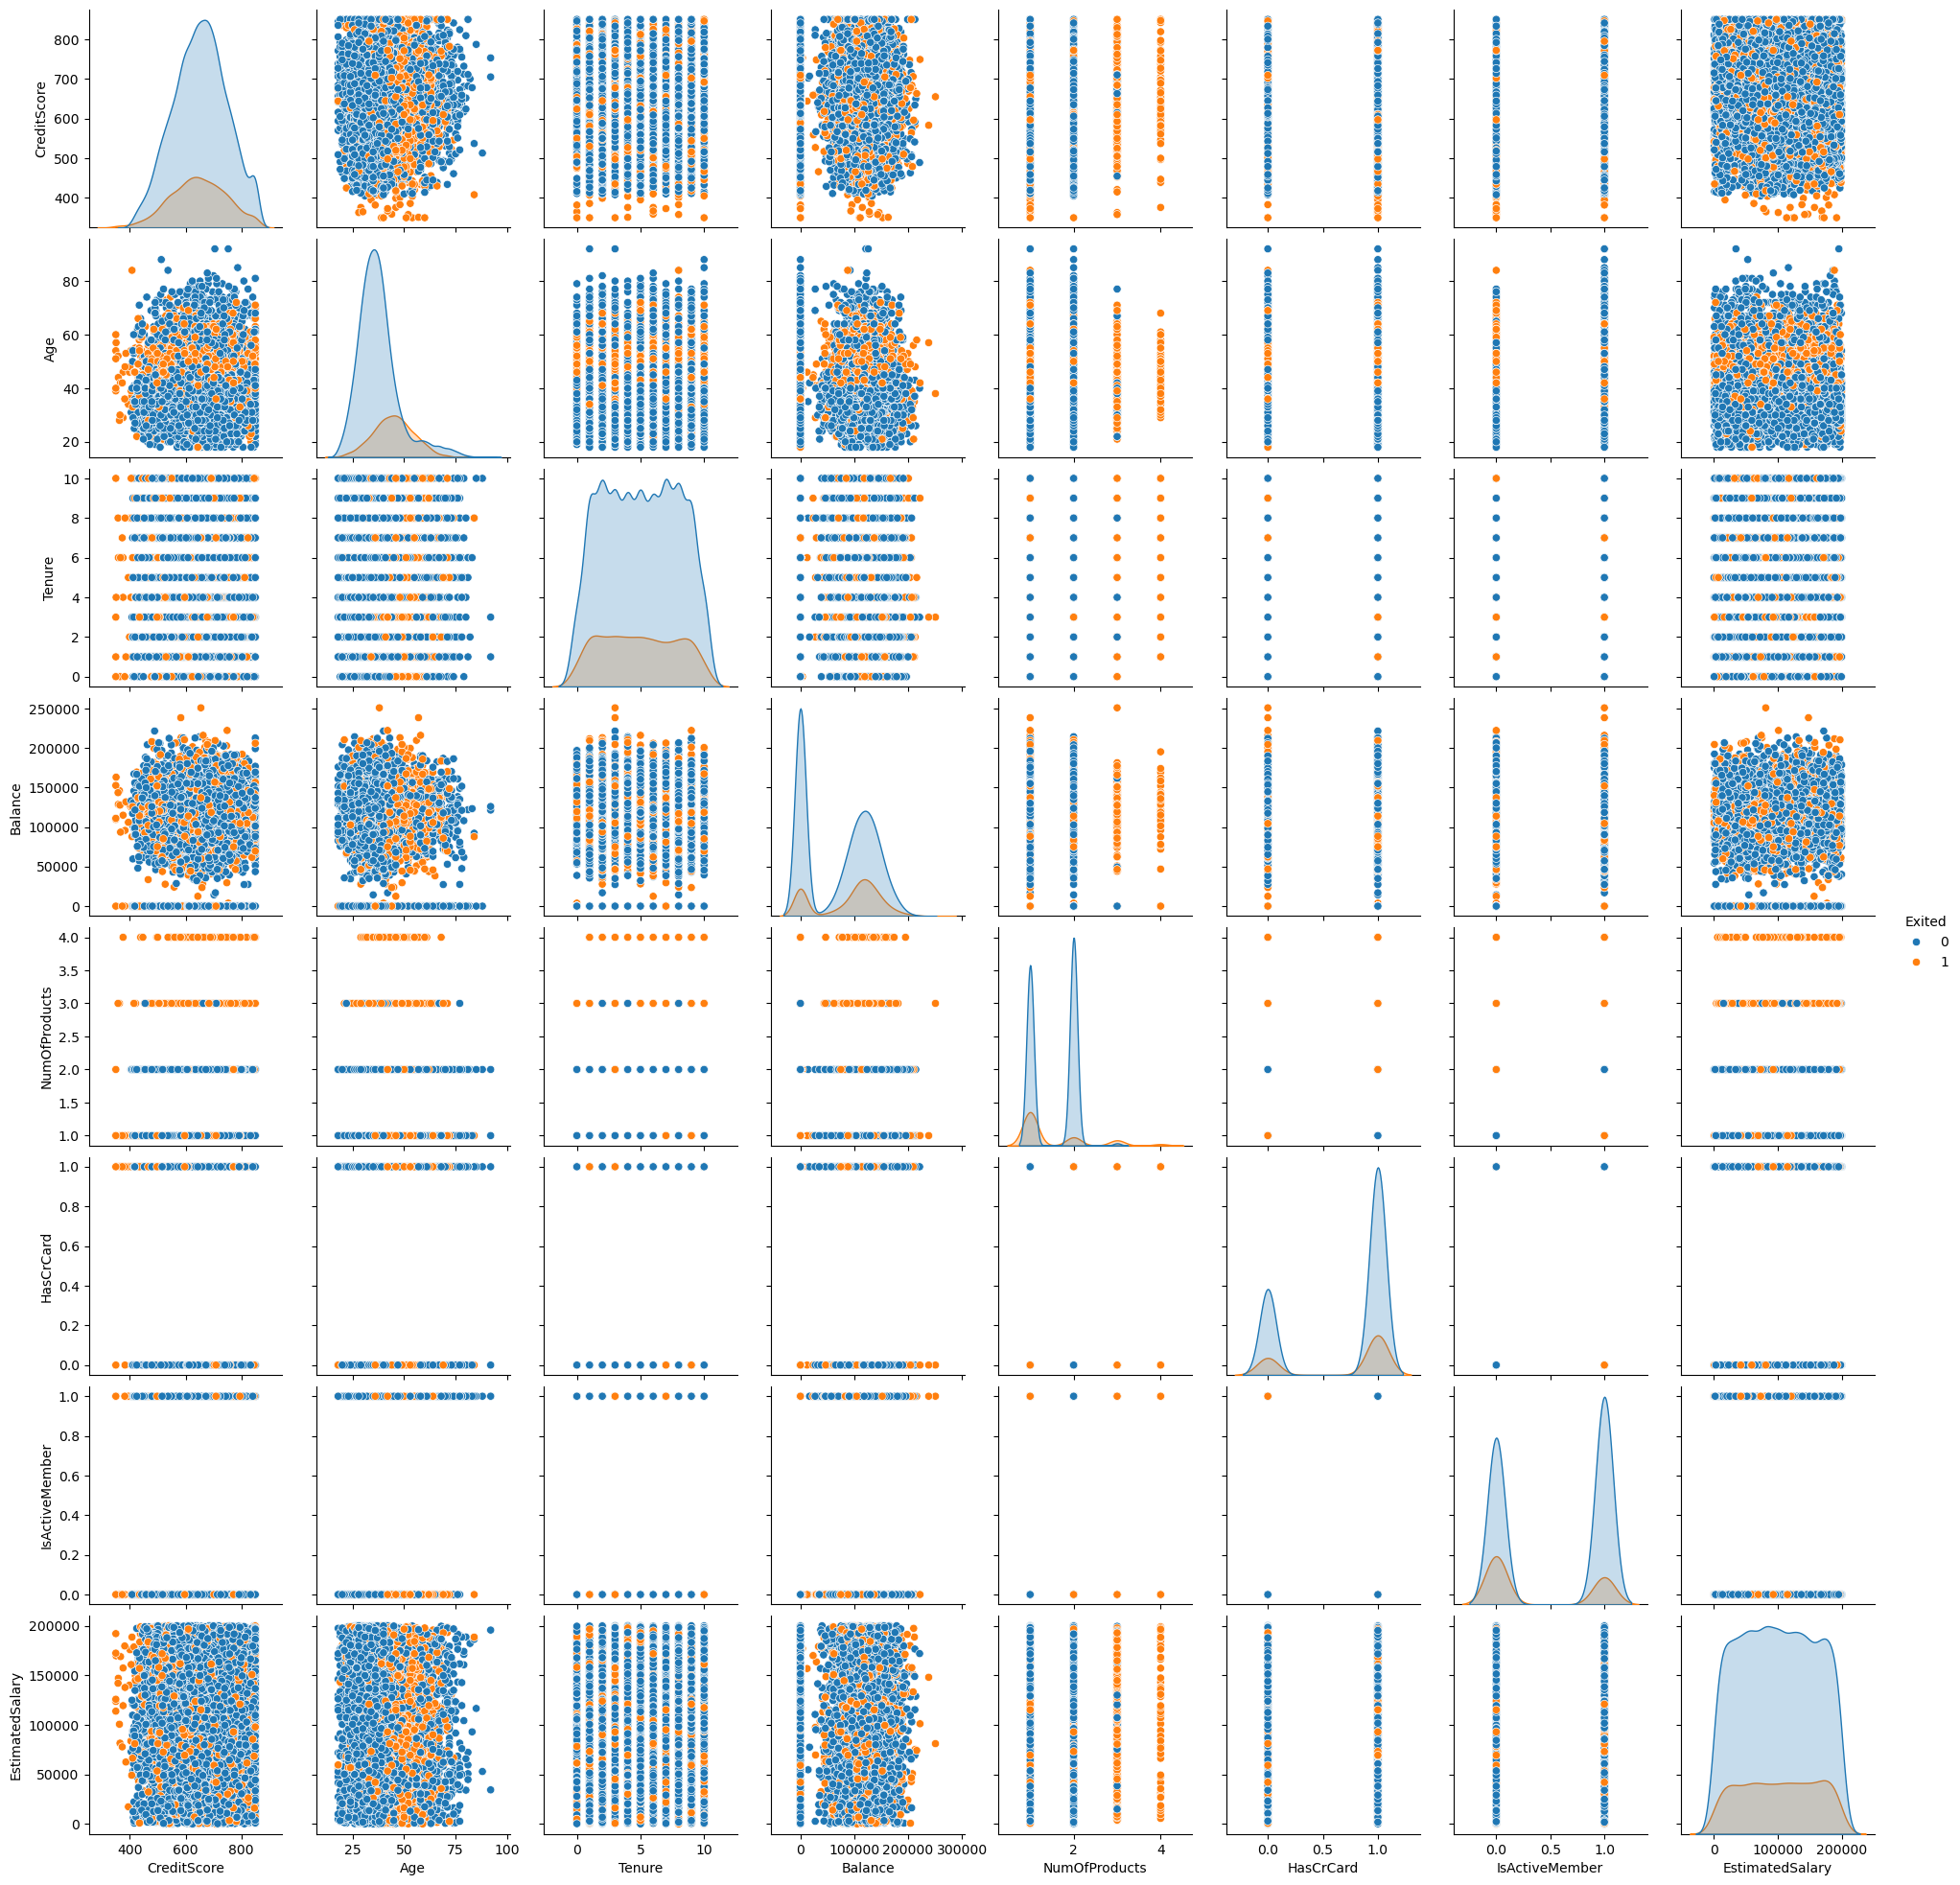

In [20]:
sns.pairplot(df,hue="Exited")
plt.show()

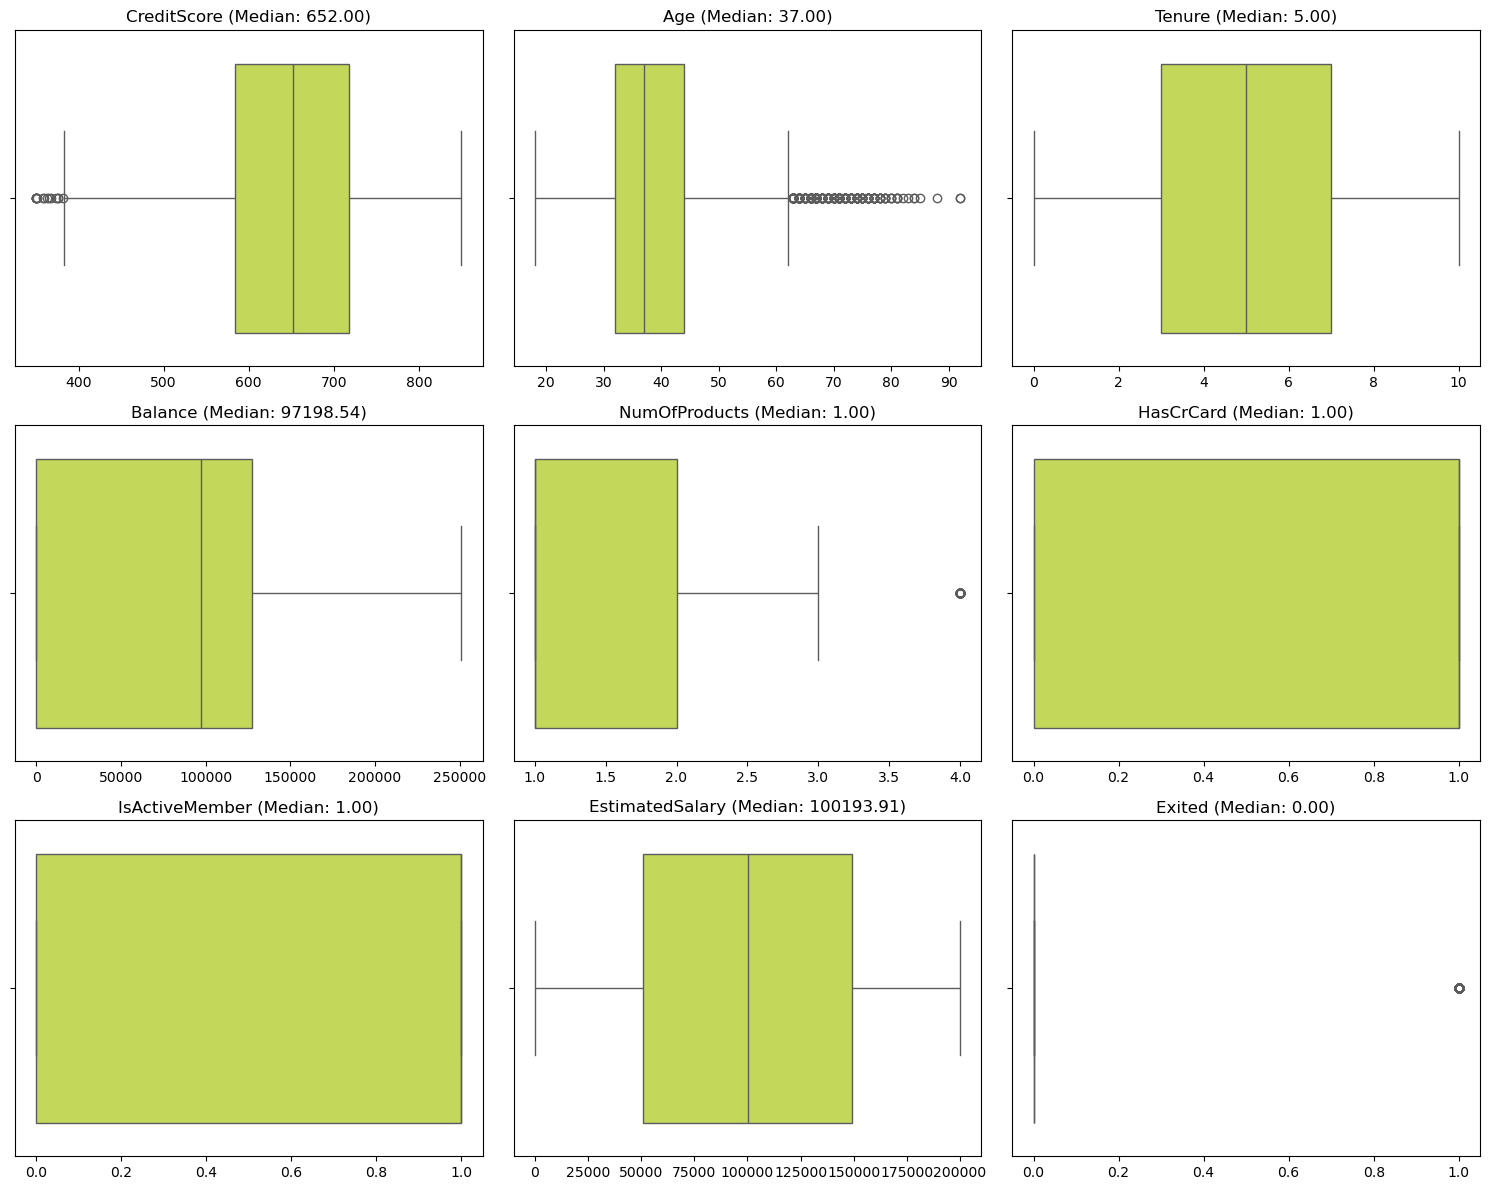

In [21]:

# Identify all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = df.select_dtypes(include=numerics).columns

# Determine number of subplots (3 columns per row)
n_cols = 3
n_plots = len(numeric_cols)
n_rows = int(np.ceil(n_plots / n_cols))

# Set up the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # flatten to 1D for easy indexing

# Plot each boxplot in the grid
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color='#D1EC46')
    axes[i].set_title(f'{col} (Median: {df[col].median():.2f})')
    axes[i].set_xlabel("")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


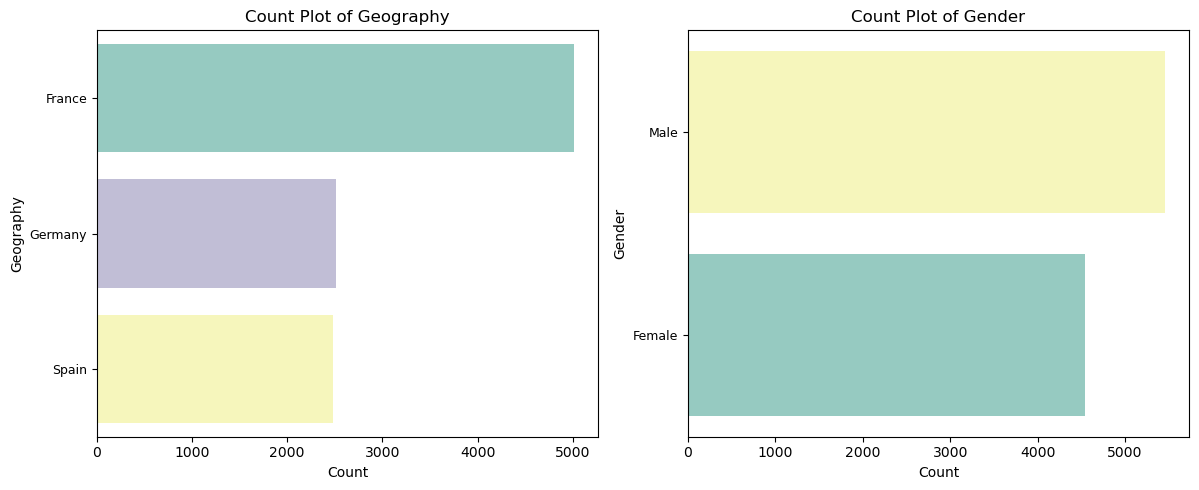

In [22]:

# Select object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns

# Limit to top N columns by unique value count (optional)
# cat_cols = [col for col in cat_cols if df[col].nunique() < 20]  # Limit high-cardinality cols

# Grid config: 3 plots per row
n_cols = 3
n_plots = len(cat_cols)
n_rows = int(np.ceil(n_plots / n_cols))

# Set up subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], hue=col, palette='Set3', legend=False)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='y', labelsize=9)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<h3>Encoding Categorical Data</h3>

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


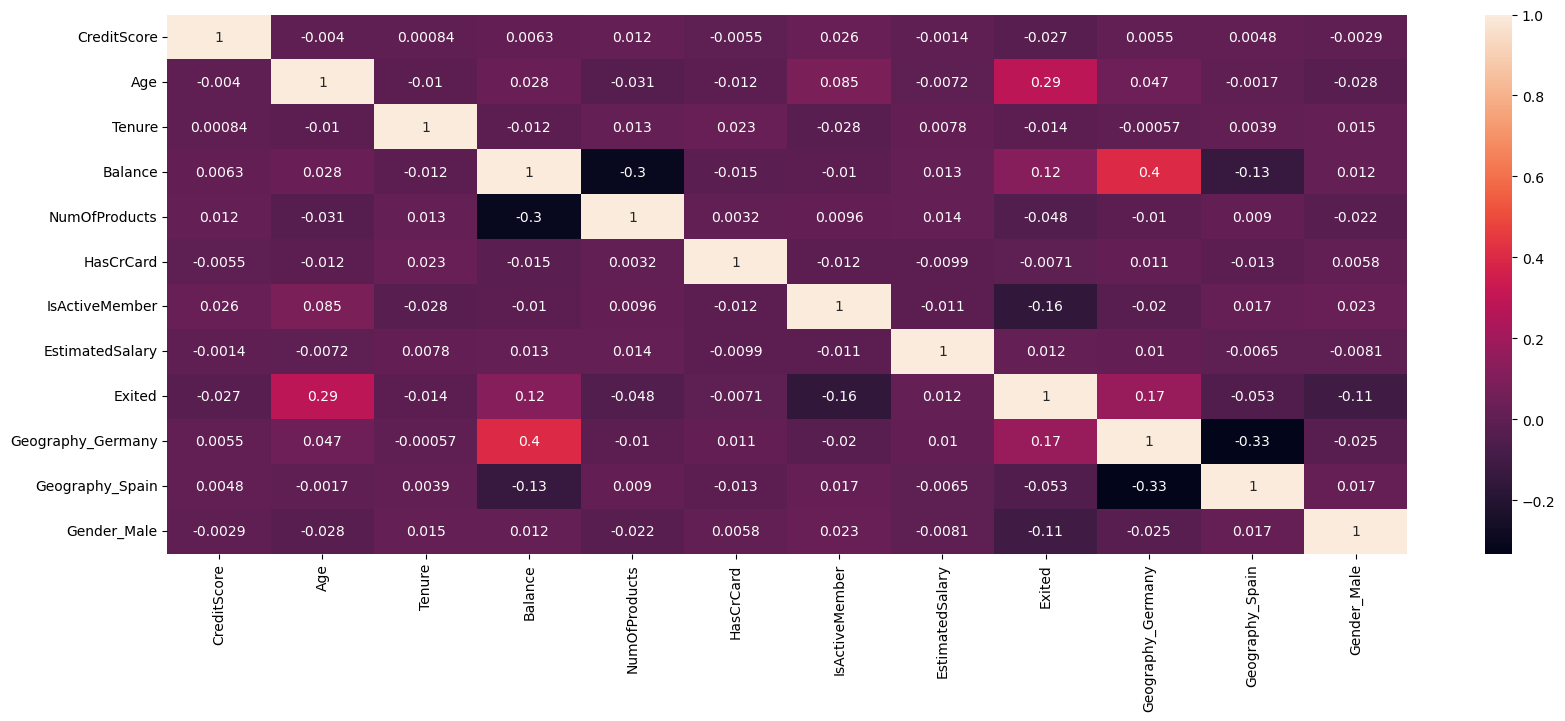

In [26]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [163]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<h3>Feature Scaling</h3>

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [29]:
from sklearn.preprocessing import StandardScaler
# Assuming df is the original dataframe
columns_to_scale = ['CreditScore', 'EstimatedSalary', 'Tenure', 'Balance', 'Age', 'NumOfProducts']

# Create a new dataframe for scaling
df_scale = df.copy()

# Standardize the selected columns
scaler = StandardScaler()
df_scale[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df_scale.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


<h3>Splitting the dataset</h3>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
X=df_scale.drop(columns=['Exited'],axis=1)
y=df_scale['Exited']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h4>Logistic Regression</h4>

In [35]:
lmodel=LogisticRegression(max_iter=100)

In [36]:
lmodel.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_predicted=lmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,accuracy_score
accuracy_score(y_test,y_predicted)

0.8112121212121212

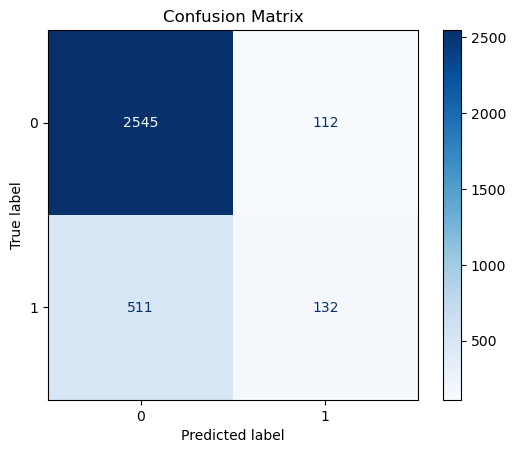

In [39]:
cm=confusion_matrix(y_test,y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.59      3300
weighted avg       0.78      0.81      0.78      3300



<h4>DecisionTree</h4>

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dmodel=DecisionTreeClassifier(random_state=0)

In [44]:
dmodel.fit(X_train,y_train)
y_predicted=dmodel.predict(X_test)

In [45]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2657
           1       0.46      0.50      0.48       643

    accuracy                           0.79      3300
   macro avg       0.67      0.68      0.67      3300
weighted avg       0.79      0.79      0.79      3300



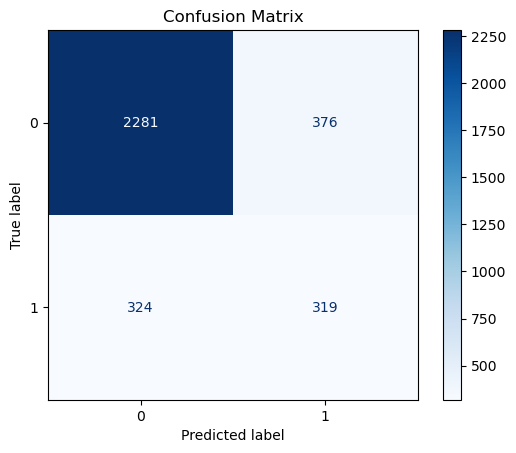

In [46]:
cm=confusion_matrix(y_test,y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

<h4>RandomForestClassifier</h4>

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rmodel=RandomForestClassifier(max_depth=200, random_state=0)

In [50]:
rmodel.fit(X_train,y_train)
y_predicted=rmodel.predict(X_test)

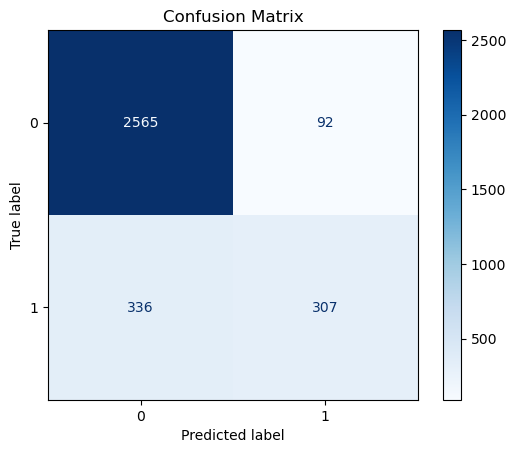

In [51]:
cm=confusion_matrix(y_test,y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.48      0.59       643

    accuracy                           0.87      3300
   macro avg       0.83      0.72      0.76      3300
weighted avg       0.86      0.87      0.86      3300



In [53]:
## Consideing all data(Random Forest)

In [54]:
y_pred_all=rmodel.predict(X)

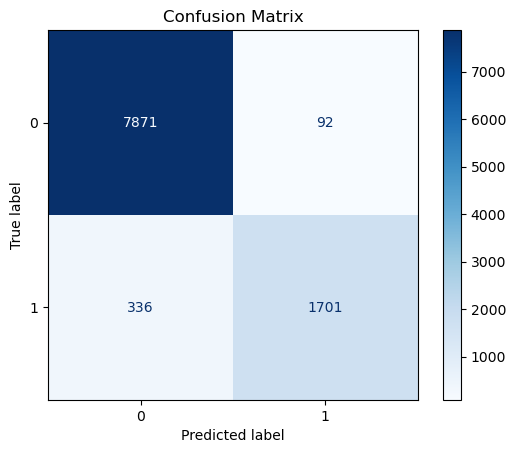

In [55]:
cm=confusion_matrix(y,y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

In [56]:
print(classification_report(y,y_pred_all))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7963
           1       0.95      0.84      0.89      2037

    accuracy                           0.96     10000
   macro avg       0.95      0.91      0.93     10000
weighted avg       0.96      0.96      0.96     10000



<h3>Handle Imbalanced data Using SMOTE</h3>

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# Step 1: Apply SMOTE to balance the training data
from collections import Counter

# Check original class distribution
print("Before SMOTE:", Counter(y_train))

# Step 1: Apply SMOTE to balance the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 5306, 1: 1394})
After SMOTE: Counter({1: 5306, 0: 5306})


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "ANN (MLP)": MLPClassifier(max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# 3. Train, predict & collect metrics
results = []
for name, model in models.items():
    # _fit_ on the SMOTE’d train set
    model.fit(X_train_smote, y_train_smote)
    
    # _predict_ on the original test set
    y_pred = model.predict(X_test)
    
    results.append({
        "Model":   name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1-Score":  f1_score(y_test, y_pred)
    })

# 4. Display sorted results
results_df = pd.DataFrame(results)
print(results_df.sort_values("F1-Score", ascending=False).round(4))

C:\Users\suven\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Accuracy  Precision  Recall  F1-Score
5              XGBoost    0.8524     0.6340  0.5739    0.6024
2        Random Forest    0.8415     0.5917  0.6019    0.5968
1                  SVM    0.7964     0.4849  0.7232    0.5805
4            ANN (MLP)    0.7930     0.4779  0.6734    0.5591
3                  KNN    0.7427     0.4065  0.6967    0.5135
0  Logistic Regression    0.7033     0.3591  0.6656    0.4665


In [61]:
rf_smote=RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)
y_pred = rf_smote.predict(X)

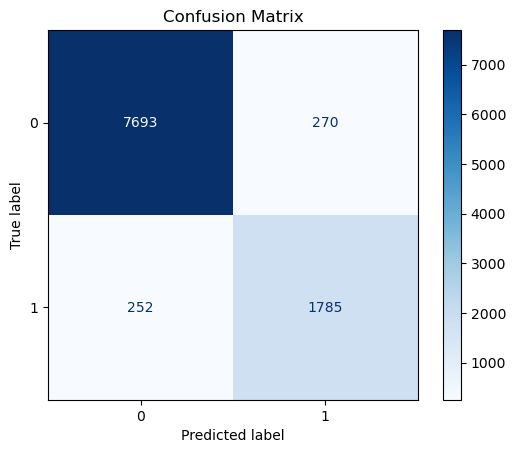

In [62]:
cm=confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

<h3>Hyperparameter tuning on Random Forest using GridSearchCV</h3>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best F1 Score: 0.8968276356730314
Test Accuracy: 0.8460606060606061


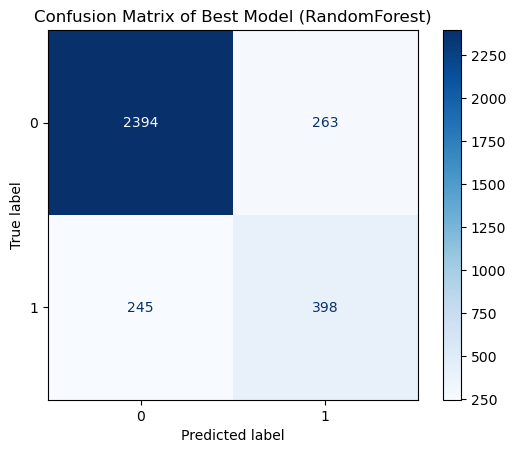

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score


# Define the base model
rf = RandomForestClassifier(
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# F1 scorer
f1 = make_scorer(f1_score, average='macro')  # or 'weighted', 'micro' depending on your case

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring=f1,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Evaluate on test set
best_rf = random_search.best_estimator_
print("Test Accuracy:", best_rf.score(X_test, y_test))

# Predict with the best model
y_predicted = best_rf.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Best Model (RandomForest)")
plt.show()

<h3>Feature Importance (Random Forest)</h3>

              Feature  Importance
1                 Age    0.270433
3             Balance    0.129113
4       NumOfProducts    0.124251
7     EstimatedSalary    0.113652
0         CreditScore    0.108900
2              Tenure    0.099177
6      IsActiveMember    0.059922
8   Geography_Germany    0.045321
10        Gender_Male    0.017922
5           HasCrCard    0.017465


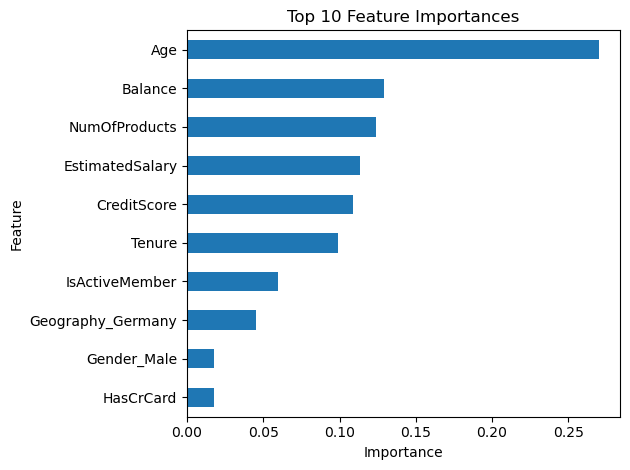

In [66]:
importances = best_rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and save top features
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df.head(10))
feature_df.to_csv('feature_importance.csv', index=False)

# Plot
feature_df.nlargest(10, 'Importance').plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # To display the most important at the top
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2657
           1       0.60      0.62      0.61       643

    accuracy                           0.85      3300
   macro avg       0.75      0.76      0.76      3300
weighted avg       0.85      0.85      0.85      3300

ROC AUC: 0.8489985958040356


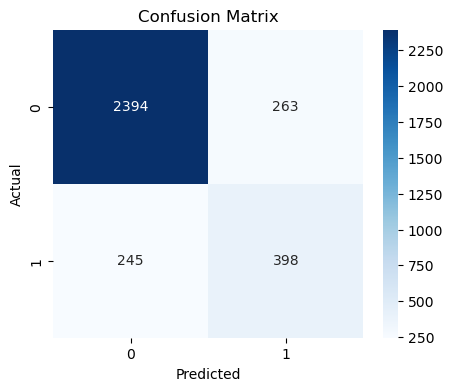

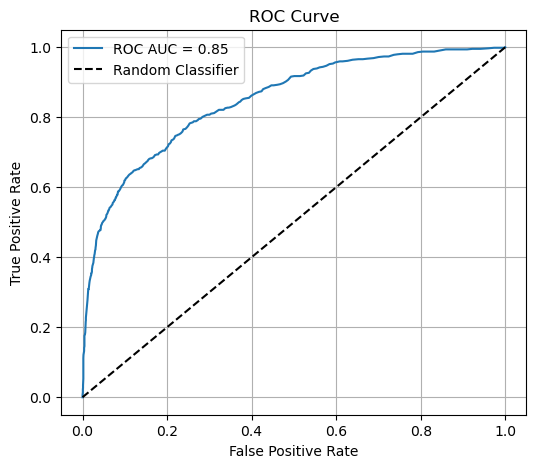

In [67]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay, precision_recall_curve
)

# --- Predictions ---
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# --- Print Scores ---
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


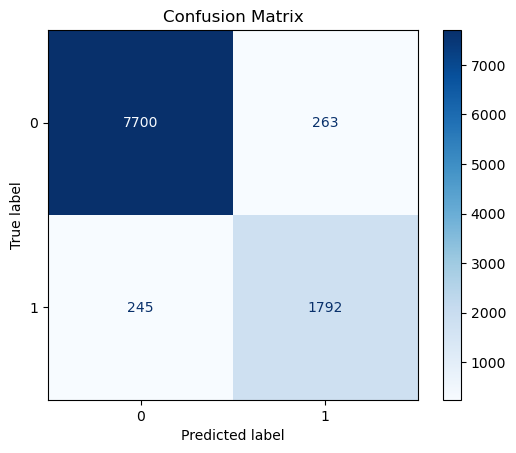

In [68]:
#Considering all actual data
y_pred_all=best_rf.predict(X)
cm=confusion_matrix(y,y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose another color map if you want
plt.title("Confusion Matrix")
plt.show()

In [69]:
print(classification_report(y, y_pred_all))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7963
           1       0.87      0.88      0.88      2037

    accuracy                           0.95     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.95      0.95      0.95     10000



In [70]:
y_test_one = best_rf.predict(X_test[0:8])

best_rf.predict_proba(X_test[0:8])


array([[0.79      , 0.21      ],
       [0.98      , 0.02      ],
       [0.75      , 0.25      ],
       [0.8       , 0.2       ],
       [0.79      , 0.21      ],
       [0.98666667, 0.01333333],
       [0.71666667, 0.28333333],
       [0.50333333, 0.49666667]])

In [71]:
y_test_one

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
y_test[0:8]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
Name: Exited, dtype: int64

### Model Calibration

In [74]:
X.loc[0,:]

CreditScore         -0.326221
Age                  0.293517
Tenure               -1.04176
Balance             -1.225848
NumOfProducts       -0.911583
HasCrCard                   1
IsActiveMember              1
EstimatedSalary      0.021886
Geography_Germany       False
Geography_Spain         False
Gender_Male             False
Name: 0, dtype: object

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      2657
           1       0.62      0.60      0.61       643

    accuracy                           0.85      3300
   macro avg       0.76      0.75      0.76      3300
weighted avg       0.85      0.85      0.85      3300



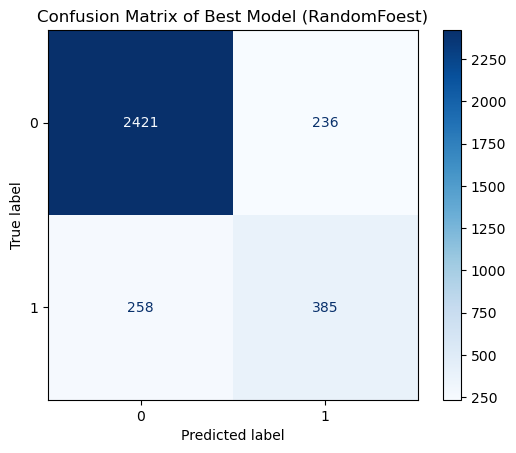

In [75]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv=5)
calibrated_rf.fit(X_train_smote, y_train_smote)
calib_preds = calibrated_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, calib_preds))
# Compute and display confusion matrix
cm = confusion_matrix(y_test, calib_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Best Model (RandomFoest)")
plt.show()

<h3>Saving the model</h3>

In [77]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(calibrated_rf, file)

In [78]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [79]:
with open('RF.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


<h3>Data Preparation for PowerBi</h3>

In [81]:
df1=pd.read_csv('Bank_Churn.csv')

In [82]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
# Predict using best_rf on full X
prob =calibrated_rf.predict_proba(X)[:, 1]
pred = calibrated_rf.predict(X)

# Make sure index of X matches df1
results = pd.DataFrame({
    'Exit_Probability': prob,
    'Predicted': pred
}, index=X.index)

# Join predictions to original dataset
df_with_predictions = df1.join(results, how='left')

In [84]:
df_with_predictions

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exit_Probability,Predicted
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.369682,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.148743,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.981617,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.100286,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.041950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.015217,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.060128,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.861239,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.113066,0


In [85]:
df_with_predictions['Predicted'].dtypes

dtype('int64')

In [86]:
df_with_predictions[(df_with_predictions['Exited']==0) & (df_with_predictions['Predicted']==1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exit_Probability,Predicted
48,15766205,Yin,550,Germany,Male,38,2,103391.38,1,0,1,90878.13,0,0.533716,1
56,15630053,Tsao,656,France,Male,45,5,127864.40,1,1,0,87107.57,0,0.664448,1
59,15804771,Velazquez,614,France,Male,51,4,40685.92,1,1,1,46775.28,0,0.622642,1
107,15812878,Parsons,785,Germany,Female,36,2,99806.85,1,0,1,36976.52,0,0.572903,1
131,15718369,Kaodilinakachukwu,795,Germany,Female,33,9,130862.43,1,1,1,114935.21,0,0.879295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,15741197,Calzada,710,Spain,Male,22,8,0.00,3,1,0,107292.91,0,0.654745,1
9746,15782550,Ma,490,Germany,Female,41,0,139659.04,1,1,1,176254.12,0,0.679431,1
9780,15617432,Folliero,816,Germany,Female,40,9,109003.26,1,1,1,79580.56,0,0.772893,1
9783,15680430,Ajuluchukwu,601,Germany,Female,49,4,96252.98,2,1,0,104263.82,0,0.949913,1


In [87]:
df_with_predictions['Predicted'].value_counts()

Predicted
0    7985
1    2015
Name: count, dtype: int64

In [88]:
df_with_predictions['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [89]:
(df_with_predictions['Exited']-df_with_predictions['Predicted']!=0).sum()

494

In [90]:
df_with_predictions.to_csv('Bank_churn_modified.csv')